# Imports

In [1]:
from config import *
from core import *
from helper import *

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import numpy as np
from scipy.optimize import least_squares

# Config

In [2]:
frequencies = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
bases = [10, 15, 20]
qtables = [JPEG_STD_LUM]

# Run Sample

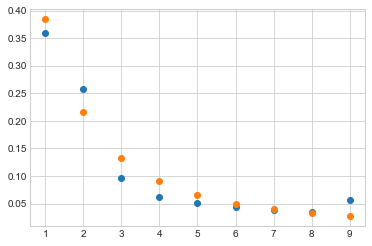

In [3]:
base = bases[0]

img = load_img_from_url(SAMPLE_IMG_URLS[2])

# Get DCT Coefficients
dct_coeffs = get_image_dct_coefs(img, frequencies, qtables)

# Get DCT Coefficient First Digits
fds = dct_coeff_to_first_digit(dct_coeffs, base)

# Get FD pmf
pmf = get_dct_fd_pmf(fds, base)


ds = [i+1 for i in range(9)]
x0 = [1,1,1]

kwargs = {
    'pmf': pmf[:,5,0],
    'base': base,
    'ds': ds
}

xs = least_squares(fun = mmse_benford_cost, x0 = x0 , kwargs = kwargs)

beta = xs.x[0]
gamma = xs.x[1]
delta = xs.x[2]

pfit = general_benford_pmf(ds, beta, gamma, delta, base)

plt.plot(ds, pmf[:,5,0], 'o')
plt.plot(ds, pfit, 'o')

# for i in range(pmf.shape[1]):
#     plt.plot(ds, pmf[:,i,0], 'o', label=f"n={frequencies[i]}")
# plt.legend(numpoints=1)

# Plots

In [23]:
pmf[:,5,:]

array([[0.35954885],
       [0.25745567],
       [0.09642839],
       [0.06205863],
       [0.05141493],
       [0.04323528],
       [0.03828177],
       [0.03429355],
       [0.05728293]])

In [13]:
xs.x
# mmse_benford_cost(xs.x, pmf, 10)

array([ 0.43899218, -0.69242182,  0.66126538])

0.004970971541243202
0.005835490880298619
0.00950921475778887


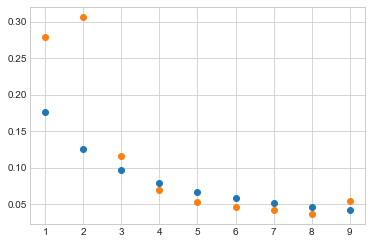

In [26]:
plt.plot(ds, pmf_ben, 'o')
plt.plot(ds, pmf[:,4,0], 'o')

print(mean_squared_error(pmf[:,4,0], pmf_ben))
print(mean_squared_error(pmf[:,5,0], pmf_ben))
print(mean_squared_error(pmf[:,6,0], pmf_ben))